## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

## Reading and Understanding Data

In [3]:
# Read the dataset
#leads = pd.read_csv("Leads.csv")
# importing the dataset
leads=pd.read_csv(r'C:\Users\ashis\OneDrive\Desktop\Assignment Upgrad\Lead Scoring\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [4]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
#Checking the Shape of dataset
leads.shape

(9240, 37)

In [6]:
# Inspecting the different columns in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking the summary of the dataset
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Data Cleaning and Preparation

Handling the 'Select' level that is present in many of the categorical variables.

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [9]:
# Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

##### Missing Values

In [10]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [11]:
# Finding the null percentages across columns
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [12]:
# dropping the columns with missing values greater than or equal to 40% .
lead=leads.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score','City','Tags'])

In [13]:
# Finding the null percentages across columns after removing the above columns
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### Insights

There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values.

Last Activity: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

Lead Source: "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

In [14]:
lead['Specialization'] = lead['Specialization'].fillna('not provided') 
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('not provided')
lead['Country'] = lead['Country'].fillna('not provided')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('not provided')
lead['Last Activity'] = lead['Last Activity'].fillna('Email Opened')
lead['Lead Source'] = lead['Lead Source'].fillna('Google')
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
# Rechecking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [16]:
lead["Country"].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [17]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead['Country'] = lead.apply(lambda x:slots(x['Country']), axis = 1)
lead['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [18]:
# Rechecking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

##### Removing Unwanted Columns

Columns below seems to be biased by having single unique value which is insignificant for the analysis. So dropping these columns

 - **I agree to pay the amount through cheque**
 - **Receive More Updates About Our Courses**
 - **Update me on Supply Chain Content**
 - **Get updates on DM Content**

In [19]:
# Removing a few columns not needed for our need
lead =lead.drop(["I agree to pay the amount through cheque","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content"],axis=1)

Now, clearly the variables Prospect ID, Lead Number and 'Last Notable Activity' won't be of any use in the analysis, so it's best that we drop these three variables.

In [20]:
lead.drop(['Prospect ID', 'Lead Number','Last Notable Activity'], 1, inplace = True)

In [21]:
# Rechecking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

##### Columns with Numerical Data

In [22]:
lead.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

Missing values in 'TotalVisits' can be imputed with mode

In [23]:
# TotalVisits missing values to be imputed with mode
lead['TotalVisits'].fillna(lead['TotalVisits'].mode()[0], inplace=True)

In [24]:
lead['Page Views Per Visit'].value_counts().head(10)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

Missing values in 'Page Views Per Visit' can be imputed with mode

In [25]:
# Page Views Per Visit missing values to be imputed with mode

lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mode()[0], inplace=True)

In [26]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((lead.isnull().sum()/lead.shape[0])*100),2).sort_values(ascending=False)

Lead Origin                                      0.0
What is your current occupation                  0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
Specialization                                   0.0
Lead Source                                      0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                        0.0
Do Not Call                                   

### EDA

##### Univariate Analysis - Categorical Variables

In [27]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

#### Converted
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [28]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.53896103896104

The lead conversion rate is 38%.

#### lead Origin

In [29]:
def check_value_counts(df,columns):
    for column in columns:
        print("*************")
        print("column_name",column)
        print(df[column].value_counts())
        sns.countplot(df[column])
        plt.xticks(rotation=90)
        plt.show()
        print("*************")
        print()

In [30]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

*************
column_name Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


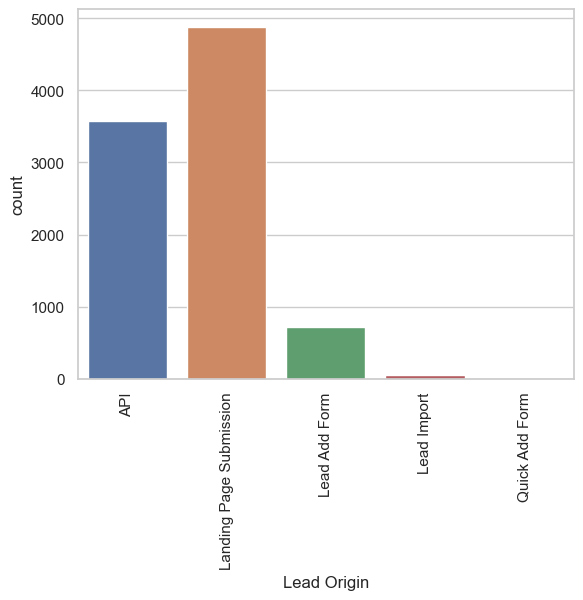

*************

*************
column_name Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


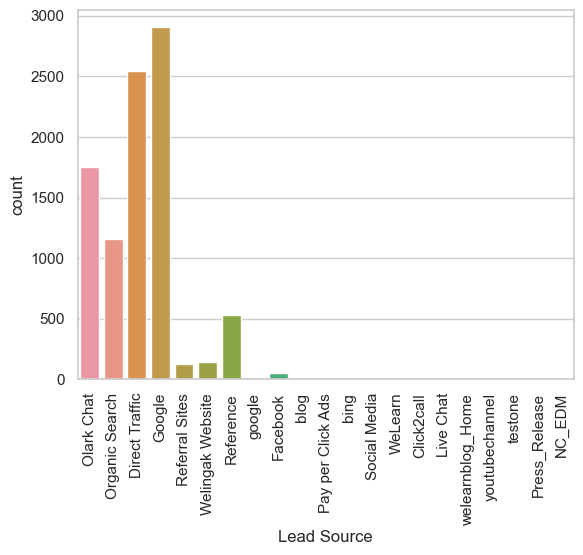

*************

*************
column_name Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64


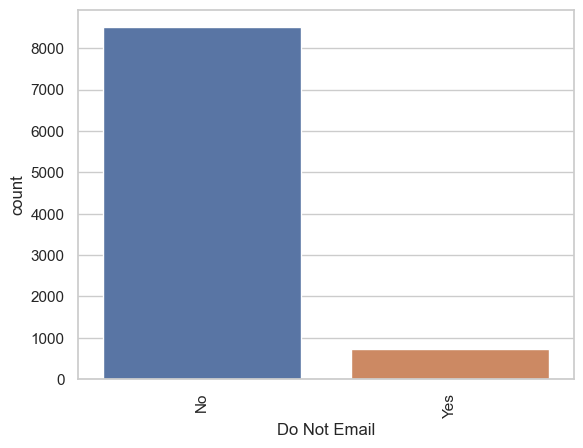

*************

*************
column_name Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64


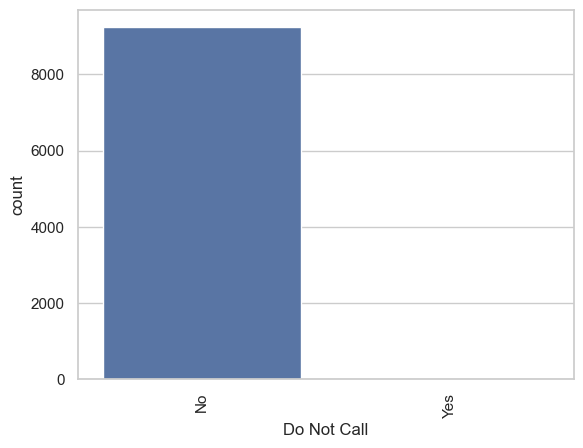

*************

*************
column_name Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


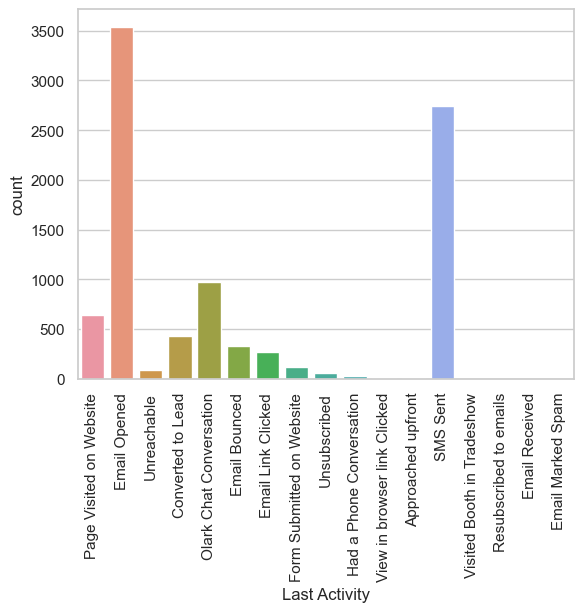

*************

*************
column_name Country
India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64


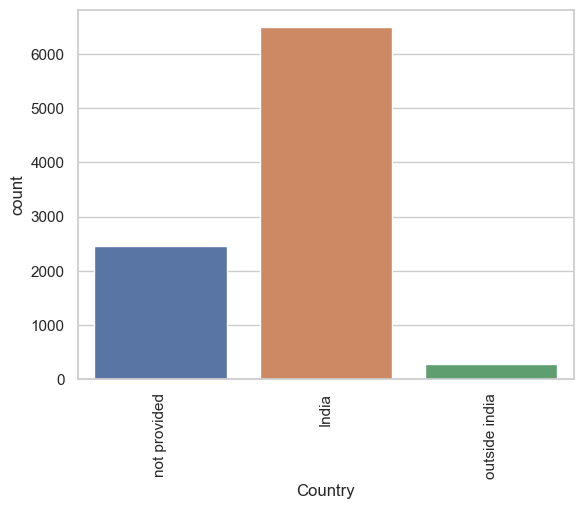

*************

*************
column_name Specialization
not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


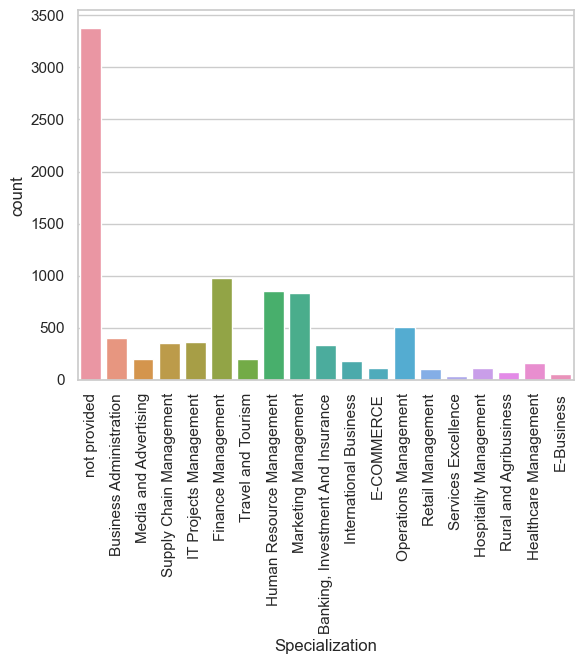

*************

*************
column_name What is your current occupation
Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


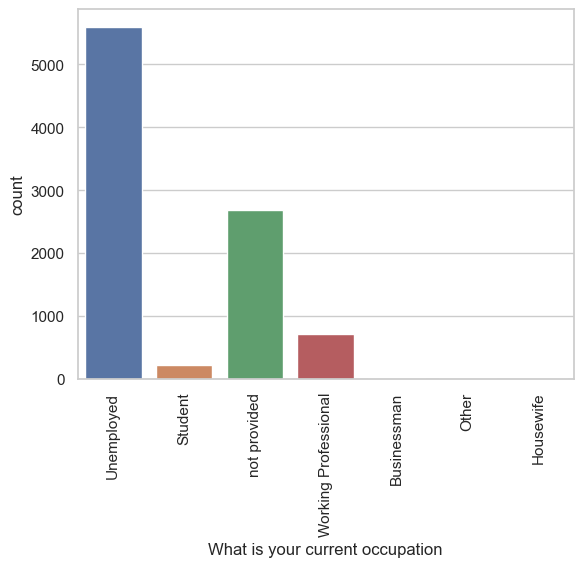

*************

*************
column_name What matters most to you in choosing a course
Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


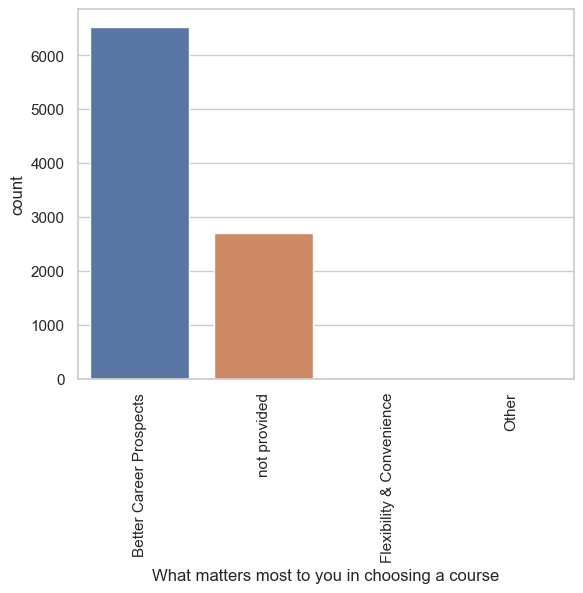

*************

*************
column_name Search
No     9226
Yes      14
Name: Search, dtype: int64


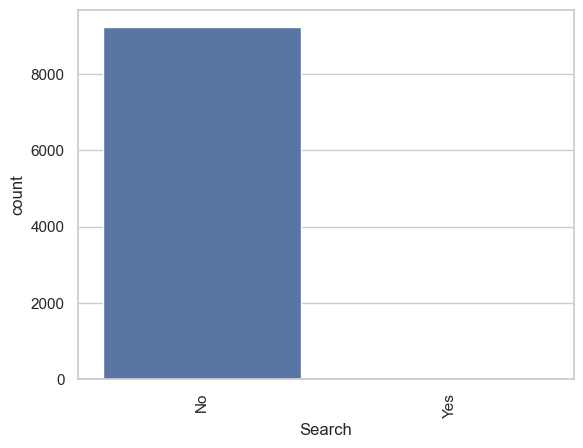

*************

*************
column_name Magazine
No    9240
Name: Magazine, dtype: int64


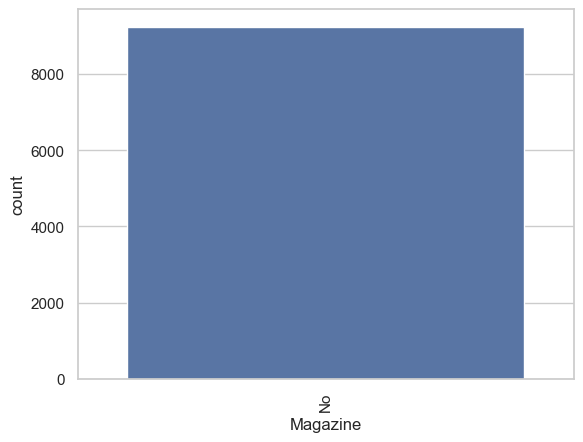

*************

*************
column_name Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64


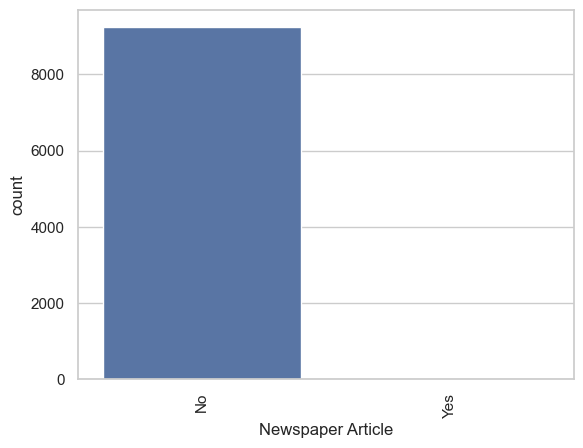

*************

*************
column_name X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64


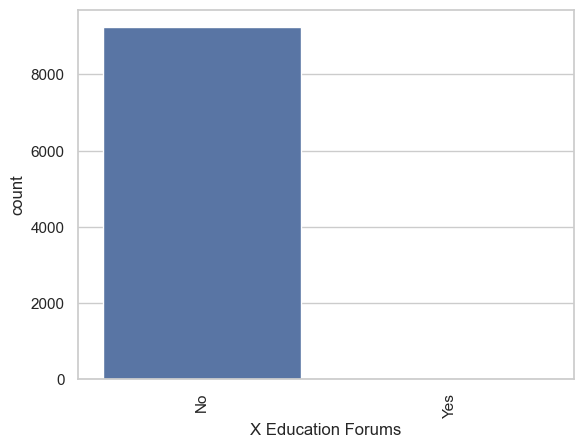

*************

*************
column_name Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64


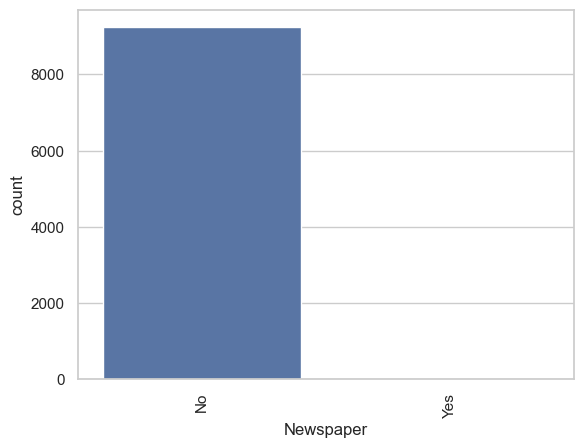

*************

*************
column_name Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


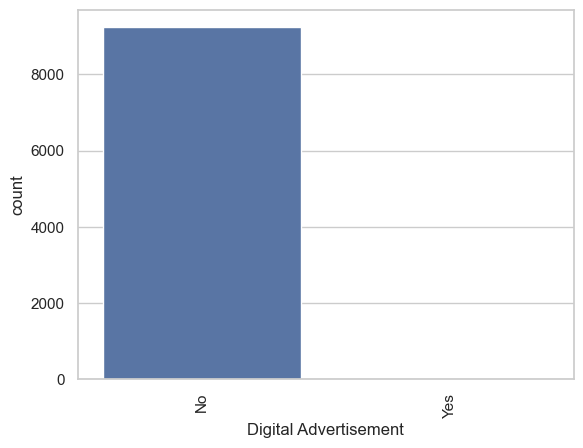

*************

*************
column_name Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64


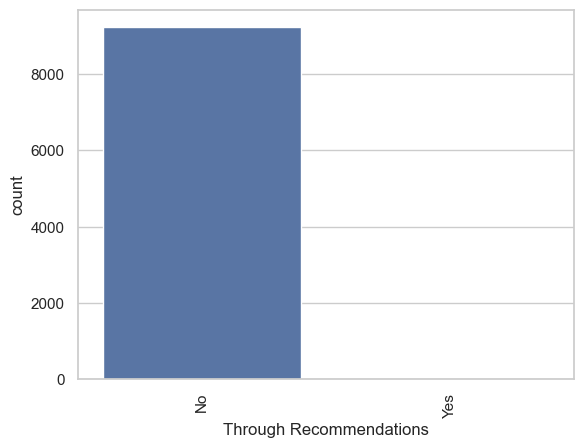

*************

*************
column_name A free copy of Mastering The Interview
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


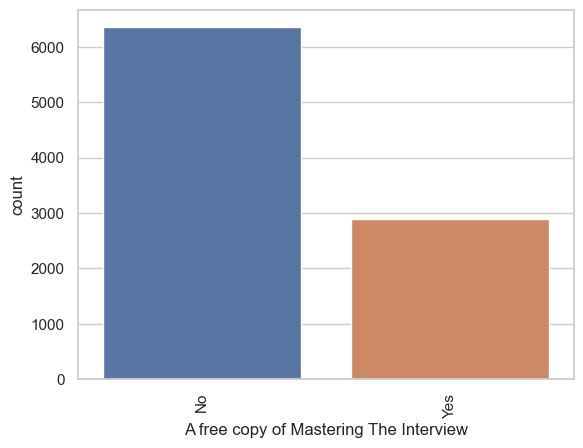

*************



In [31]:
# Creating Count Plot for all the categorical variable

leads_df_numeric = lead.select_dtypes(include=[np.number])
leads_df_categorical = lead.select_dtypes(exclude=[np.number])
check_value_counts(lead,leads_df_categorical.columns)

In [32]:
# to display value_counts of diffrent columns
def check_value_counts_with_hue(df,columns):
    for column in columns:
        print("*************")
        print("column_name",column)
        print(df[column].value_counts())
        sns.countplot(x = str(column), hue = "Converted", data = df,palette='Set1')
        plt.xticks(rotation=90)
        plt.show()
        print("*************")
        print()

*************
column_name Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


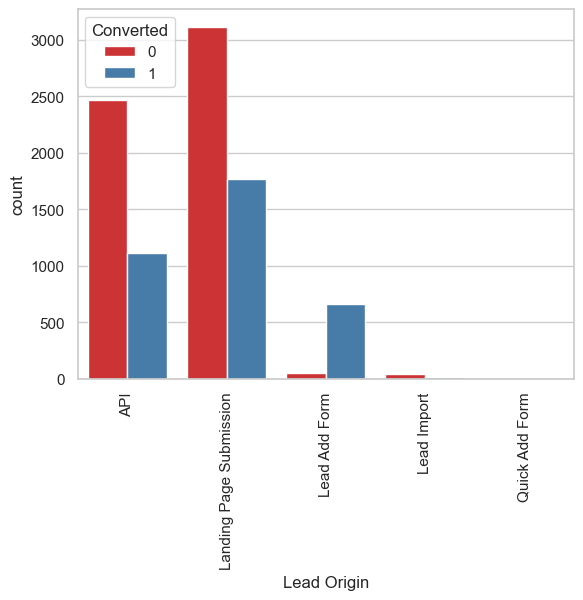

*************

*************
column_name Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


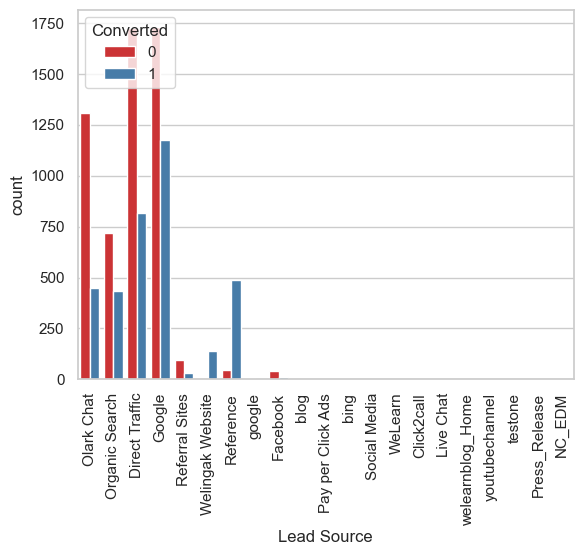

*************

*************
column_name Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64


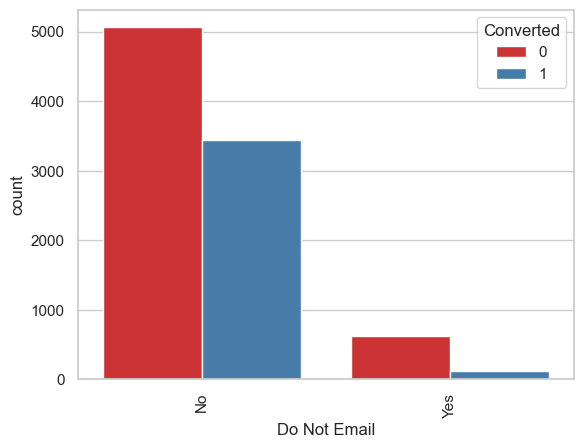

*************

*************
column_name Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64


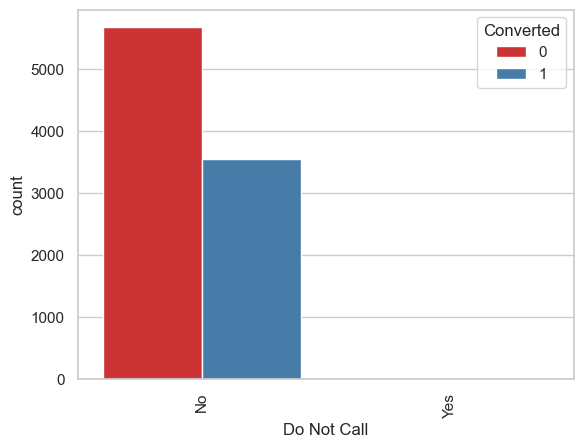

*************

*************
column_name Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


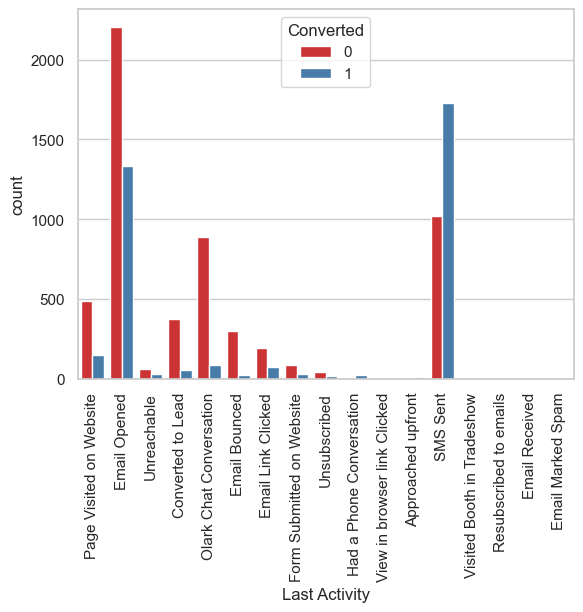

*************

*************
column_name Country
India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64


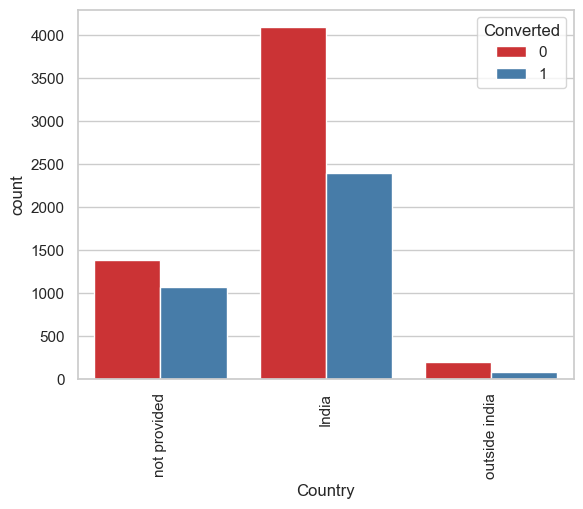

*************

*************
column_name Specialization
not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


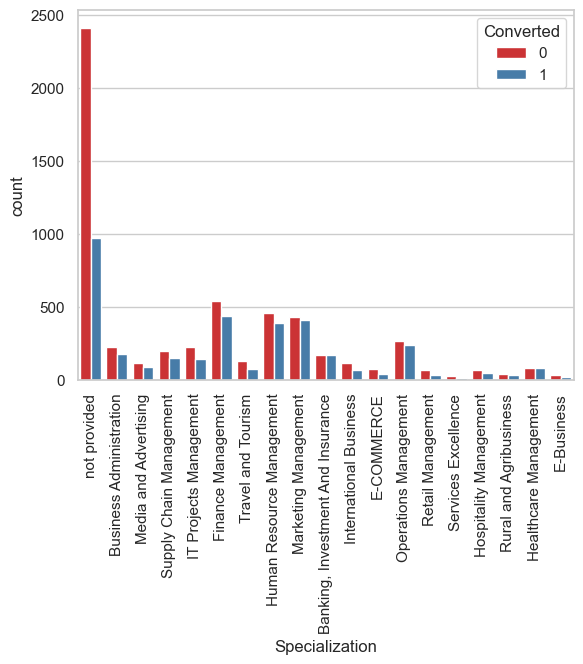

*************

*************
column_name What is your current occupation
Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


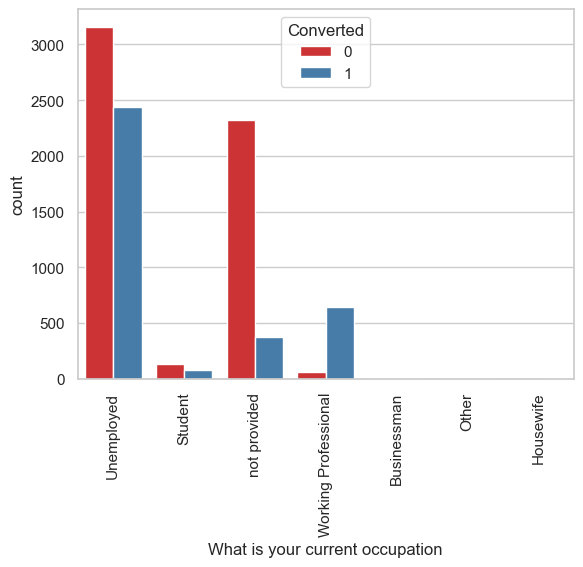

*************

*************
column_name What matters most to you in choosing a course
Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


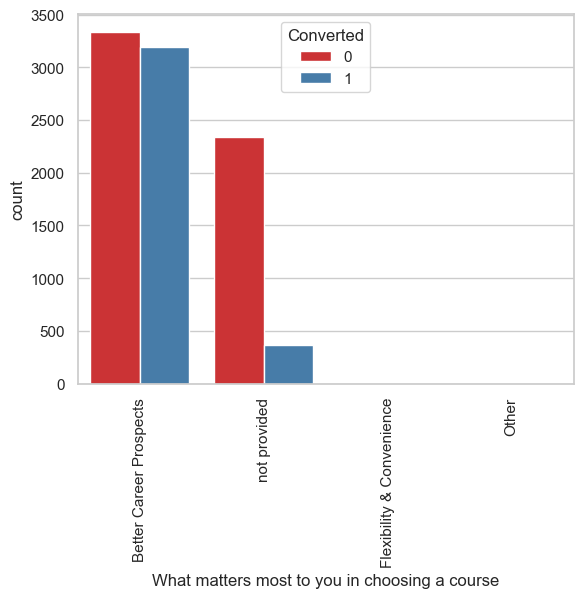

*************

*************
column_name Search
No     9226
Yes      14
Name: Search, dtype: int64


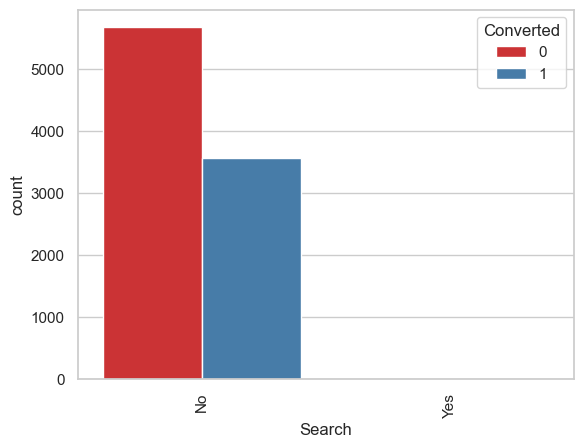

*************

*************
column_name Magazine
No    9240
Name: Magazine, dtype: int64


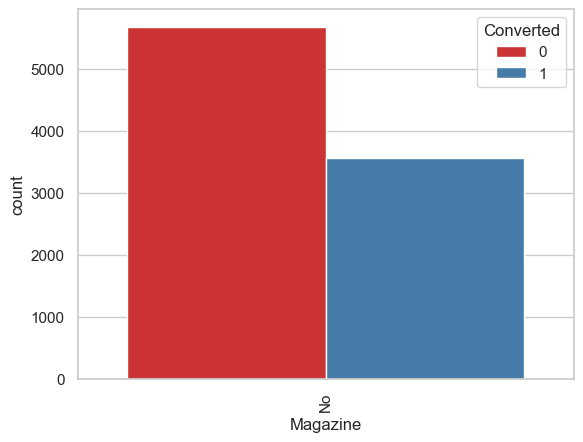

*************

*************
column_name Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64


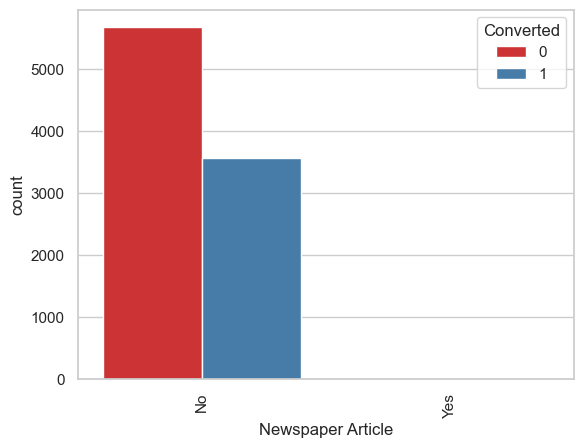

*************

*************
column_name X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64


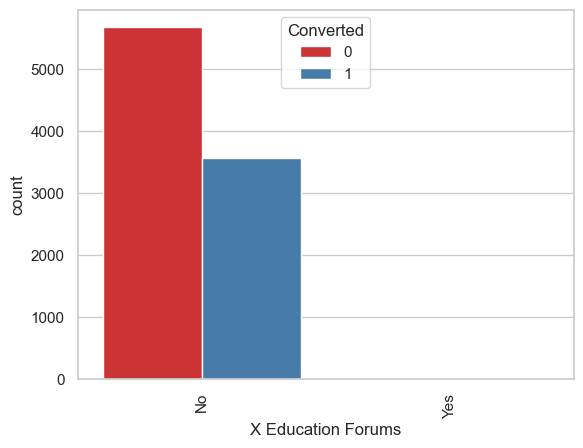

*************

*************
column_name Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64


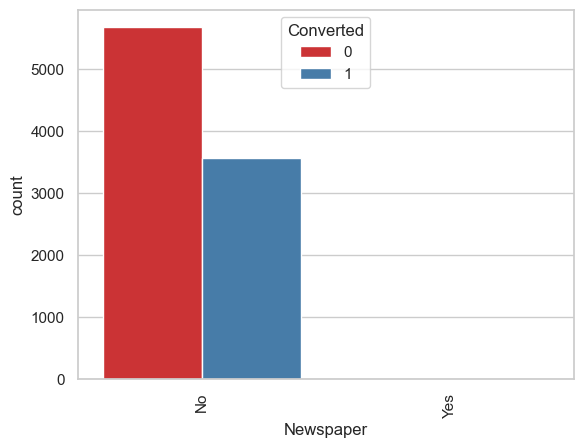

*************

*************
column_name Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


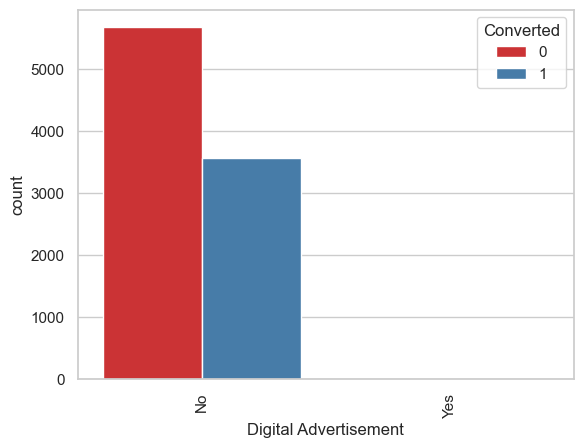

*************

*************
column_name Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64


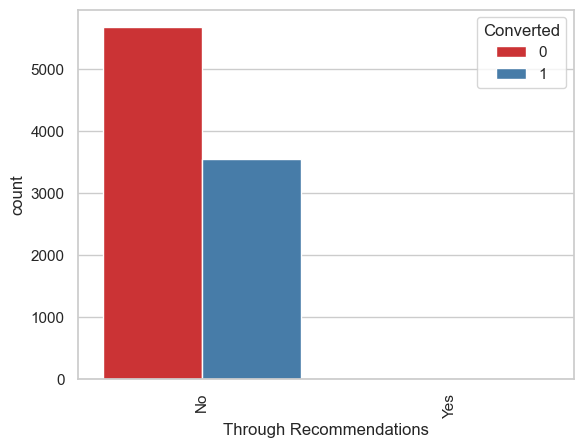

*************

*************
column_name A free copy of Mastering The Interview
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


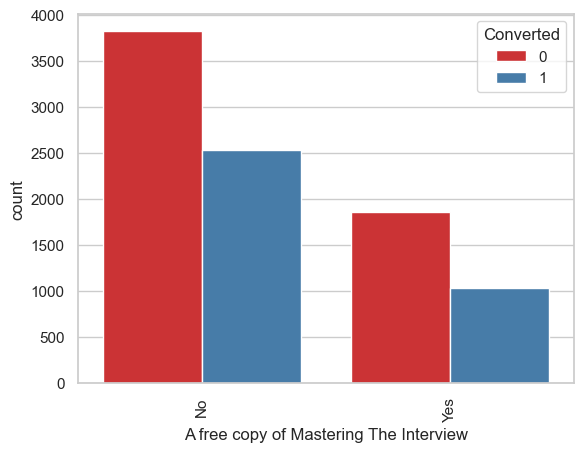

*************



In [33]:
check_value_counts_with_hue(lead,leads_df_categorical.columns)

### Inference

1. Lead Origin :
    1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
    2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
    3. Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

2. Most of the lead have their Email opened as their last activity. Conversion rate for leads with last activity as SMS Sent is almost 60%.
3. In 'Counrty' most values are 'India' no such inference can be drawn
4. Working Professionals going for the course have high chances of joining it. Unemployed leads are the most in numbers but has around 30-35% conversion rate.
5. Most leads have not selected any specific specialization.
6. Lead Source :
    1. Google and Direct traffic generates maximum number of leads.
    2. Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [34]:
# Need to replace 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [35]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.

lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

##### Univariate Analysis - Numerical Variables

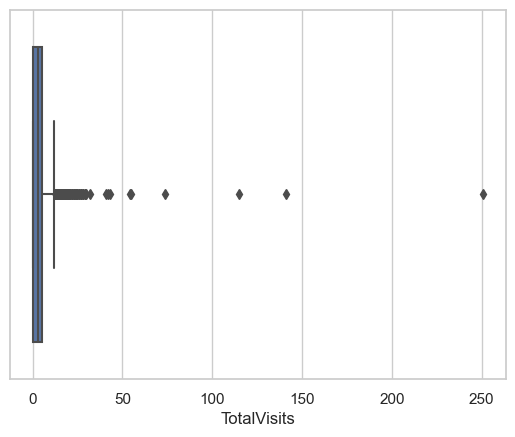

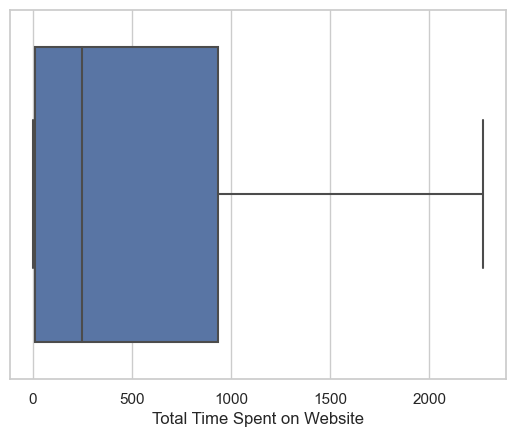

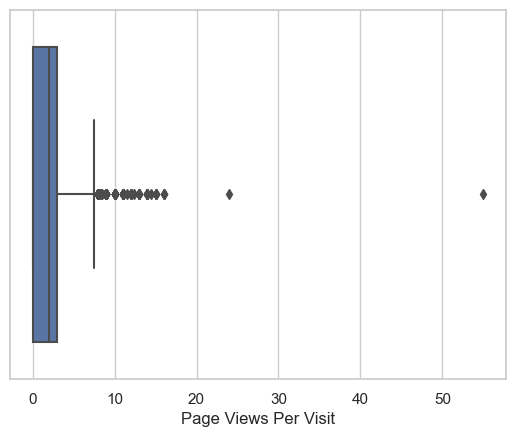

In [36]:
for column in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
        sns.boxplot(data=lead,x=column)
        plt.show()

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [37]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [38]:
lead['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [39]:
lead['Page Views Per Visit'].describe()


count    9240.000000
mean        2.327787
std         2.164258
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis

In [40]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

In [41]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

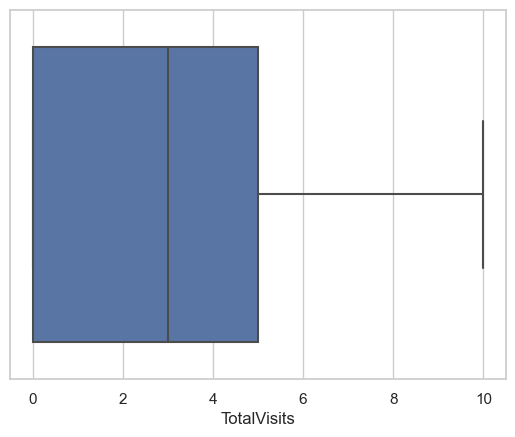

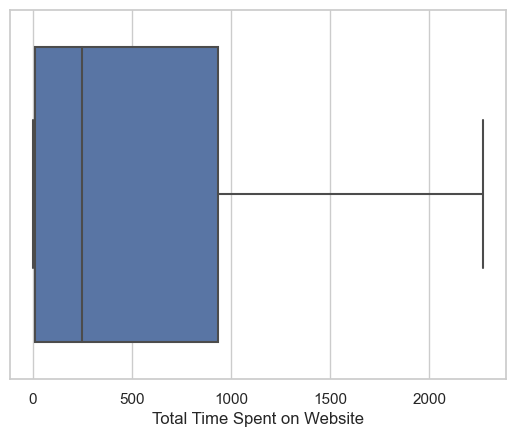

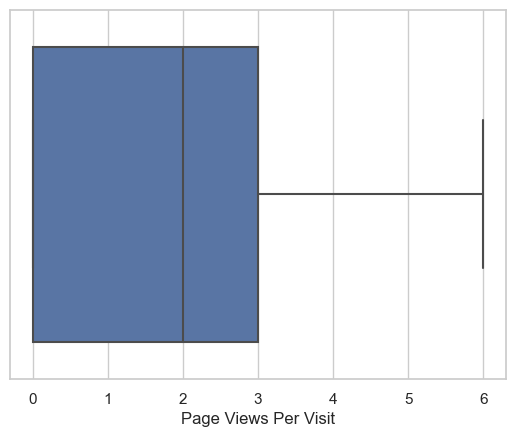

In [42]:
for column in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
        sns.boxplot(data=lead,x=column)
        plt.show()

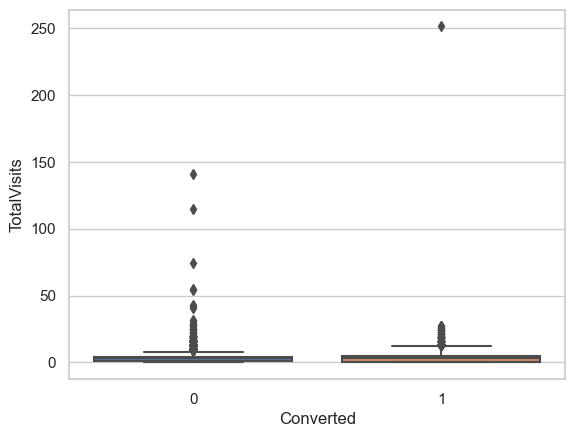

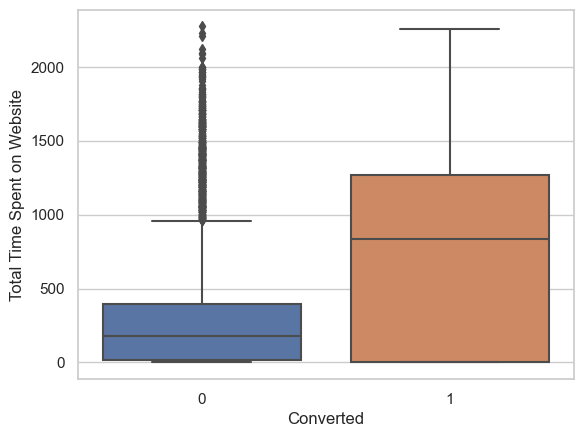

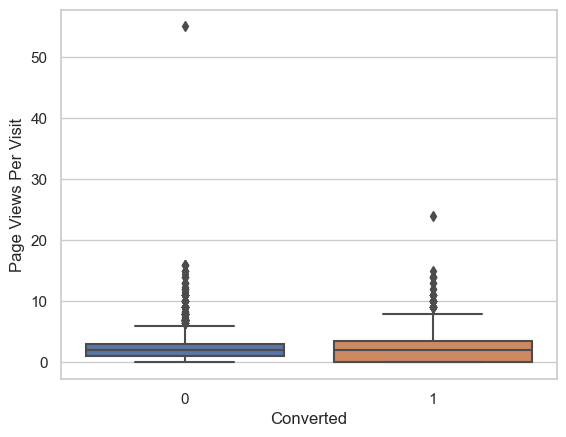

In [43]:
for column in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
        sns.boxplot(data=leads,x = "Converted",y=column)
        plt.show()

# Inferences


1. Median for converted and not converted leads are the same.
2. Nothing can be concluded on the basis of Total Visits.
3. Leads spending more time on the weblise are more likely to be converted.
4. Median for converted and unconverted leads is the same for 'Page Views per visit'


In [44]:
# We can club the last activities to "Other_Activity" which are having less data.
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

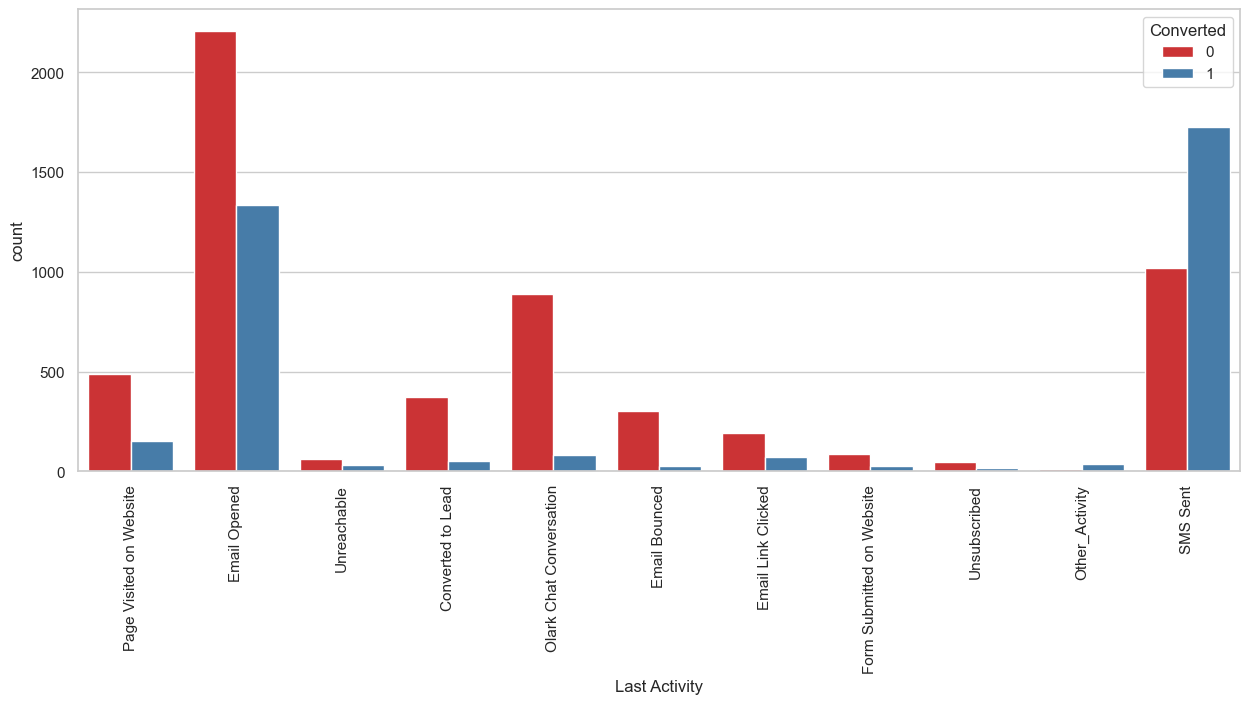

In [45]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)

#### Results

Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [46]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [47]:
lead = lead.drop(['Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations',
                            'A free copy of Mastering The Interview','What matters most to you in choosing a course'],1)

In [48]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9240 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9240 non-null   float64
 8   Last Activity                    9240 non-null   object 
 9   Specialization                   9240 non-null   object 
 10  What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


##### Bivariate Analysis


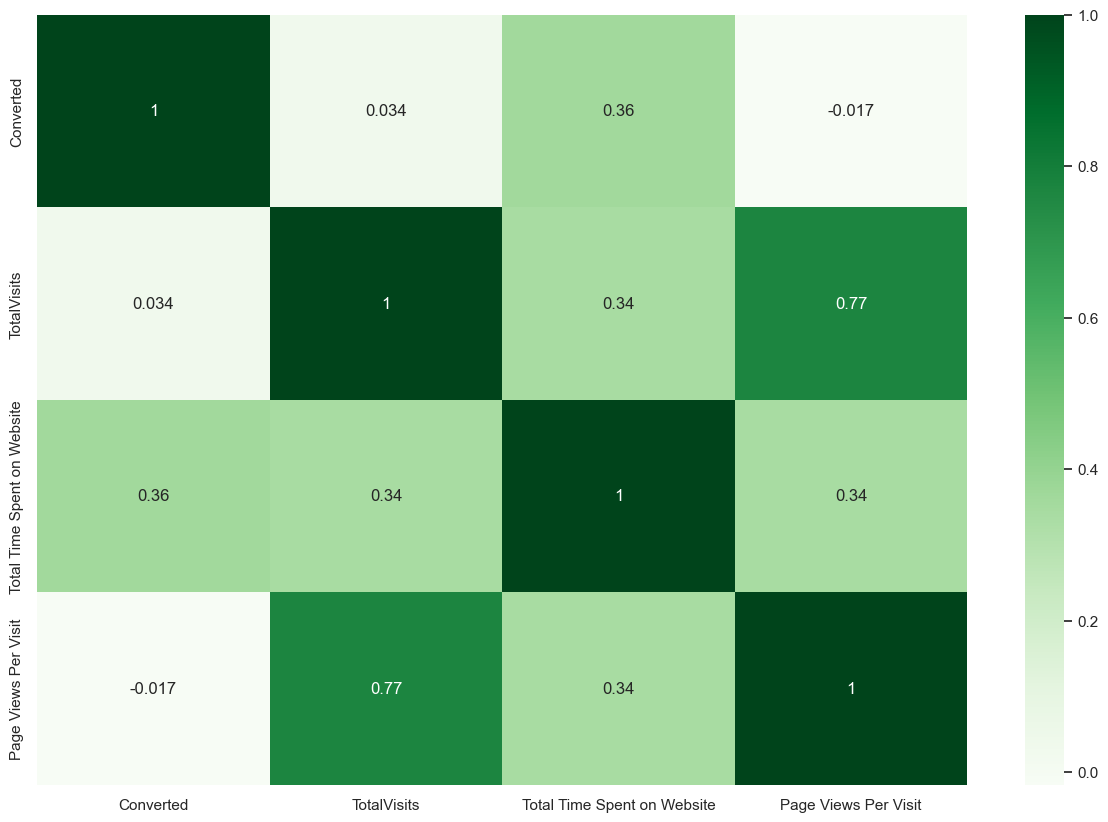

In [49]:
# Heatmap to understand the attributes correlation:-

plt.figure(figsize = (15,10))        
ax = sns.heatmap(lead.corr(),annot = True,cmap='Greens')

Inference:

1. 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of 0.77
2. 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

## Data Preparation

#### Mapping Binary categorical variables

In [50]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[vars] = lead[vars].apply(binary_map)

In [51]:
lead.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website             not provided   
1             Email Opened             not provided   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead             not provided   

  What is your current occupation  
0                      Unemployed  
1                      Unemployed  
2                         Student  
3                      Unemployed  
4                      Unemployed

In [52]:
# Creating list 'cat_col' of categorical columns :-

cat_col= lead.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

##### Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation'

In [53]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation']], drop_first=True)
dummy_data.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1

In [54]:
# Adding dummy variables dataset 'dummy_data' to original dataset 'lead':-

lead= pd.concat([dummy_data,lead],axis = 1)

In [55]:
#Checking head of dataframe 'lead':-

lead.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1

In [56]:
# Dropping repeated columns for which dummy variables were created:-

lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation'
                             ],1,inplace = True)

In [57]:
lead.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1

In [58]:
# Checking shape of 'lead' dataframe:-

lead.shape

(9240, 52)

In [59]:
# Checking data types column wise again:-

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 1   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 2   Lead Origin_Lead Import                               9240 non-null   uint8  
 3   Lead Origin_Quick Add Form                            9240 non-null   uint8  
 4   Lead Source_Facebook                                  9240 non-null   uint8  
 5   Lead Source_Google                                    9240 non-null   uint8  
 6   Lead Source_Olark Chat                                9240 non-null   uint8  
 7   Lead Source_Organic Search                            9240 non-null   uint8  
 8   Lead Source_Others                                    9240

### Test-Train Split

In [60]:
# Putting feature variable to X:-

X = lead.drop(['Converted'], axis=1)

# Displaying head :-

X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1

In [61]:
# Putting response variable to y:-

y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the data into train and test of 70:30 ratio:-

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
# Checking shape of 'X_train' dataset after splitting:-

X_train.shape

(6468, 51)

In [64]:
# Checking shape of 'X_test' dataset after splitting:-

X_test.shape

(2772, 51)

In [65]:
# Verifying info of data set after splitting:-

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 1   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 2   Lead Origin_Lead Import                               9240 non-null   uint8  
 3   Lead Origin_Quick Add Form                            9240 non-null   uint8  
 4   Lead Source_Facebook                                  9240 non-null   uint8  
 5   Lead Source_Google                                    9240 non-null   uint8  
 6   Lead Source_Olark Chat                                9240 non-null   uint8  
 7   Lead Source_Organic Search                            9240 non-null   uint8  
 8   Lead Source_Others                                    9240

### Feature Scaling

We are using 'StandardScaler' here for scaling.

In [66]:
# Creating 'scaler' object for 'StandardScaler':-

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:-

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:-
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1871                     0                   0                       1   
6795                     0                   0                       0   
3516                     0                   0                       1   
8105                     0                   1                       0   
3934                     0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1871                           1                                        0   
6795                           1                                        0   
3516                           1                                        0   
8105                           0                                        0   
3934                           1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
1871                                      0                             0   
6795                                      0                             0   
3516                                      0                             0   
8105                                      0                             0   
3934                                      0                             0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871                                      0                       0   
6795                                      0                       0   
3516                                      0                       0   
8105                                      0                       1   
3934                                      0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
1871                          0               

#### Checking the Correlation Matrix


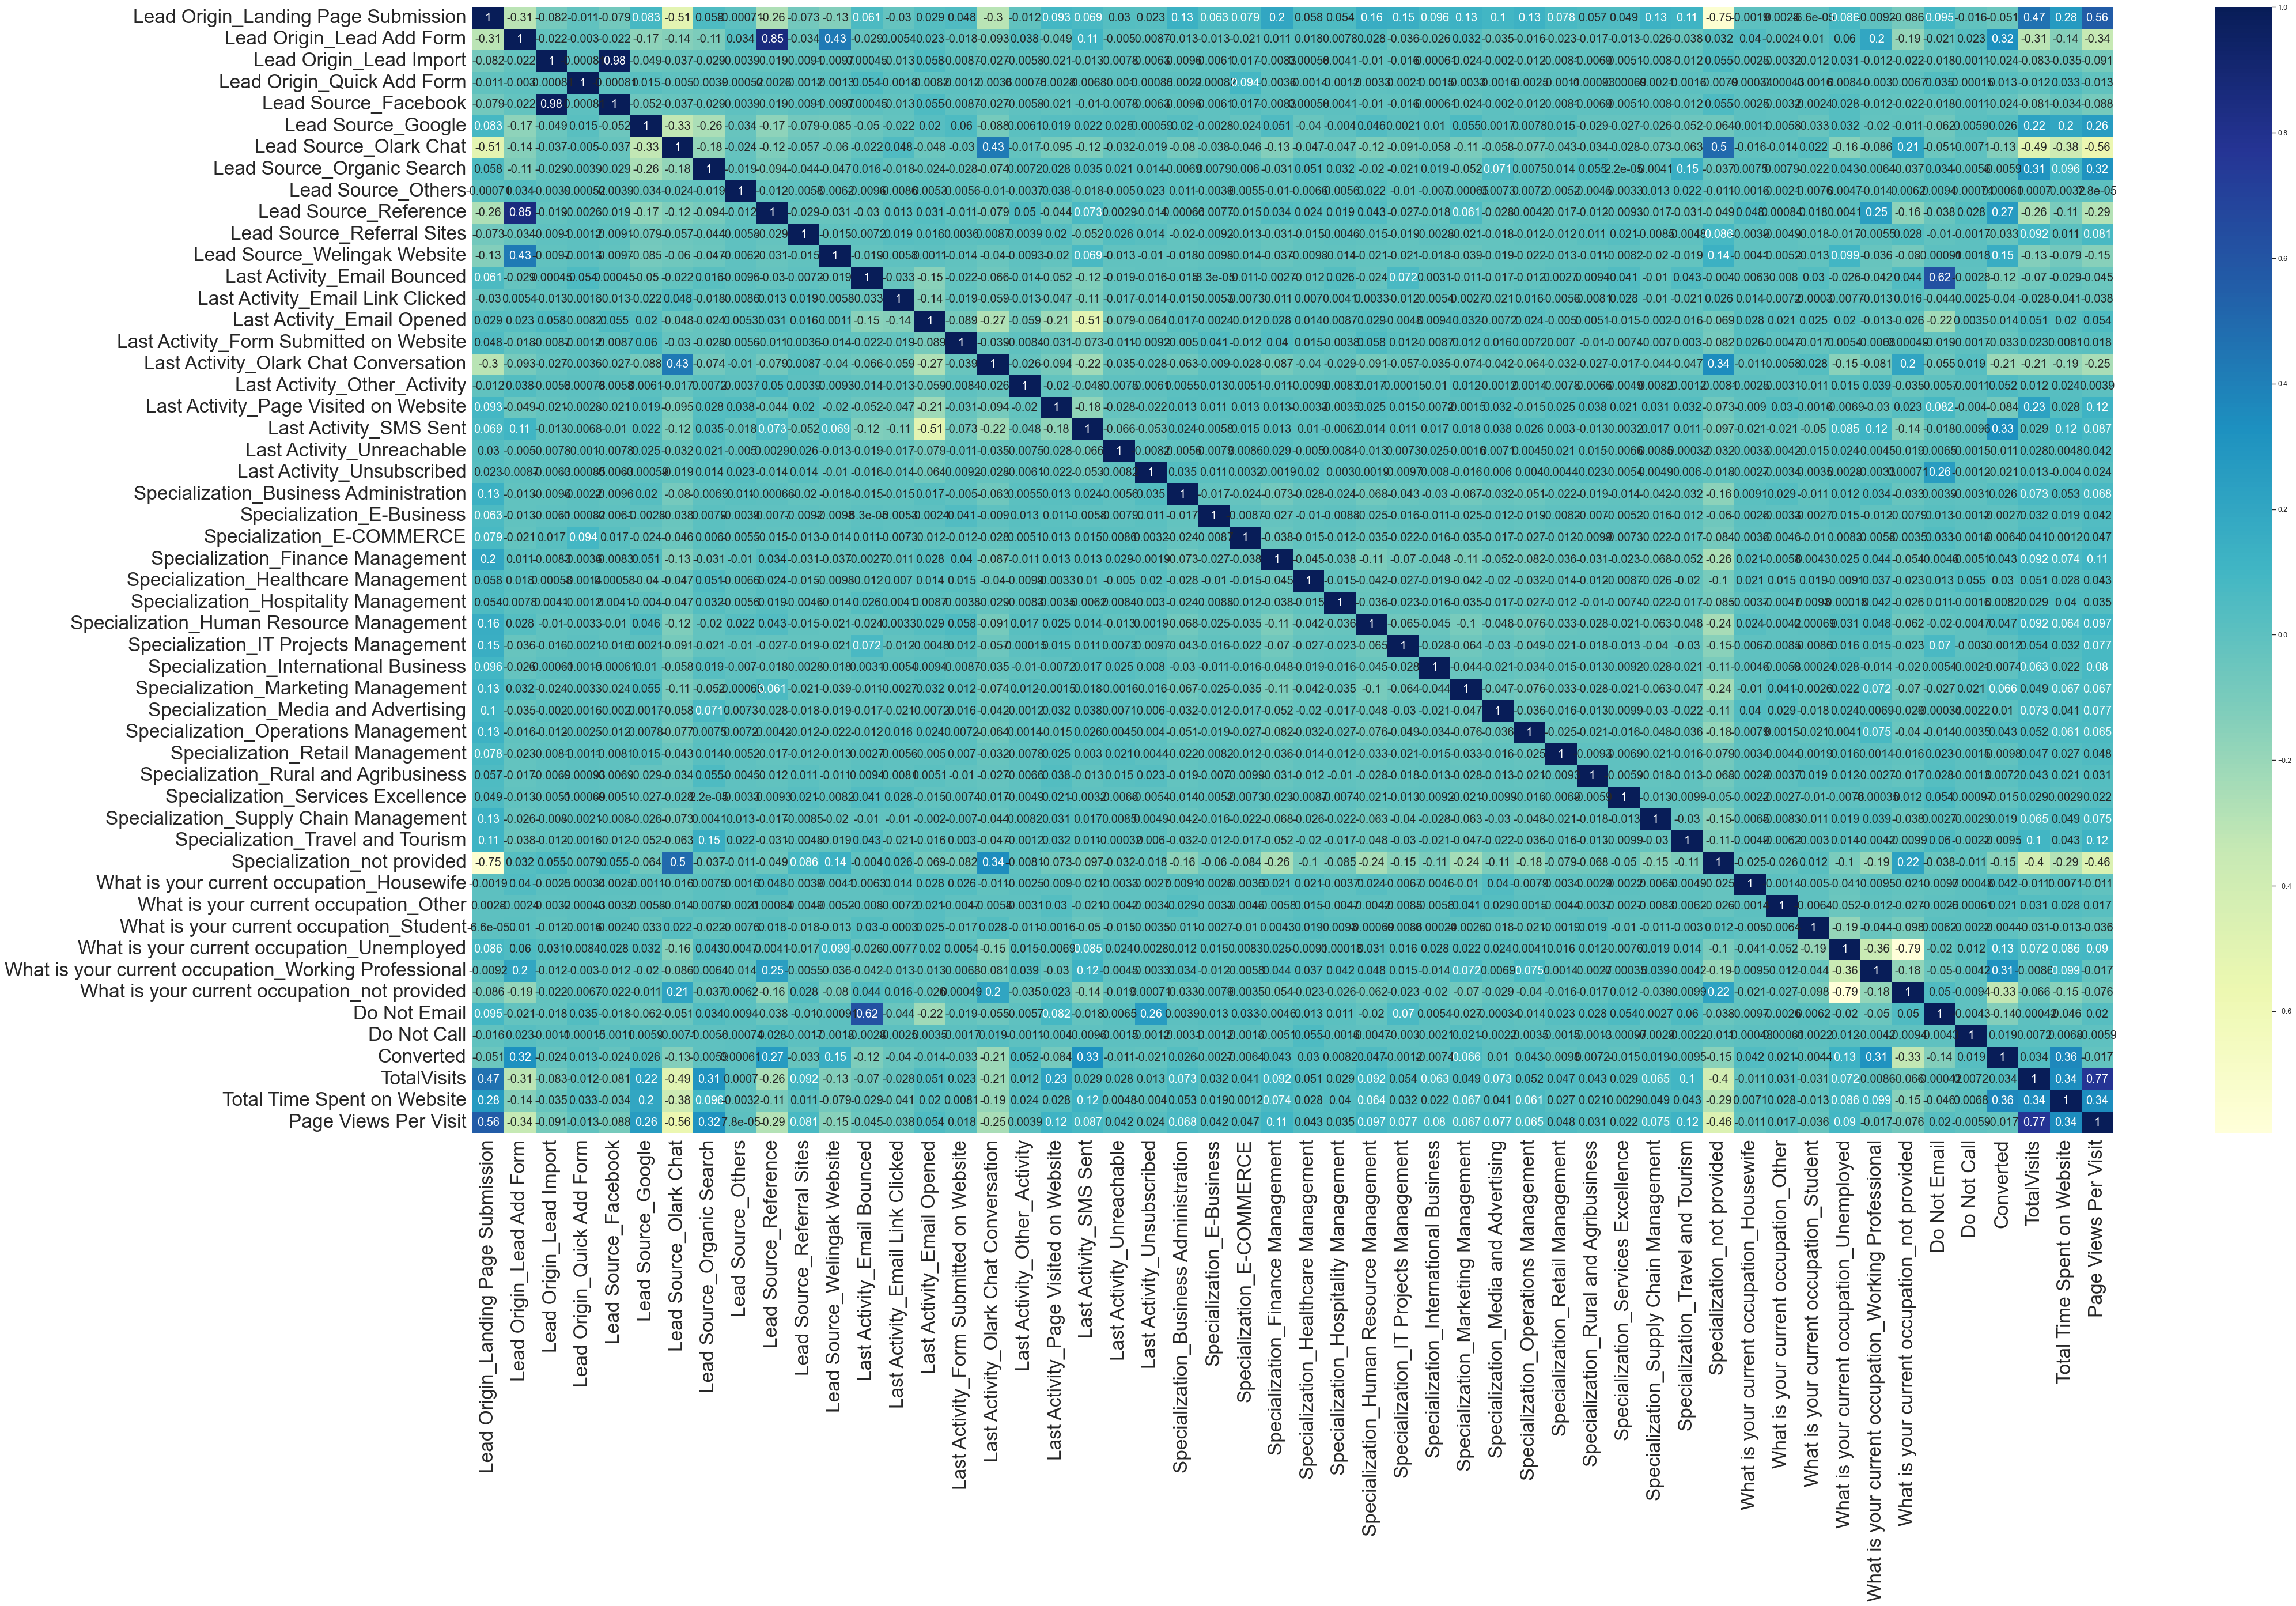

In [67]:
# Let's check the correlation coefficients to see which variables are highly correlated:-

plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(lead.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

### Observation

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map for building the logistic model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.
From above heatmap we can see that:- 
- 'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98.
- 'Do Not Email' and 'Last Activity_Email Bounced' having higher correlation.
- 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.
- 'TotalVisits' and 'Page Views Per Visit' having correlation of 0.77.
- 'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current Occupation_Working Professionals' having positive correlation with our target variable 'Converted'.

### Model Building

#### Model Building using Stats Model & RFE

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [69]:
#Displaying columns selected by RFE and their weights:-

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Business Administration

In [70]:
# Storing columns selected by RFE into 'col' and displaying it:-

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness', 'Specialization_not provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided', 'Do Not Email',
       'Do Not Call', 'Total Time Spent on Website'],
      dtype='object')

In [71]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Manag

In [72]:
# Creating X_test dataframe with RFE selected variables:-

X_train_rfe = X_train[col]

### Using manual feature elimination

#### Running First Training Model

### Model 1
Starting with all the columns selected by RFE .

In [73]:
#Importing required 'statsmodels' library:-

import statsmodels.api as sm

In [74]:
# Add a constant:-

X_train_sm = sm.add_constant(X_train_rfe)

# Building first fitted model:-

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [75]:
# Print a summary of the logistic regression model obtained:-

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.6
Date:                Sun, 14 Jan 2024   Deviance:                       5201.2
Time:                        11:38:00   Pearson chi2:                 8.05e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7964      0.150     -5.297      0.000      -1.091      -0.502
Lead Origin_Landing Page Submission                     -1.0420      0.129     -8.047      0.000      -1.296      -0.788
Lead Origin_Lead Add Form                                2.7554      0.204     13.505      0.000       2.356       3.155
Lead Source_Facebook                                    -0.6622      0.522     -1.267      0.205      -1.686       0.362
Lead Source_Olark Chat                                   1.0812      0.124      8.733      0.000       0.839       1.324
Lead Source_Welingak Website                             2.4919      0.750      3.323      0.001       1.022       3.962
Last Activity_Email Opened                               0.7375      0.110      6.687      0.000       0.521       0.954
Last Activity_Olark Chat Conversation                   -0.6094      0.193     -3.165      0.002      -0.987      -0.232
Last Activity_Other_Activity                             2.2561      0.488      4.623      0.000       1.300       3.213
Last Activity_SMS Sent                                   1.8831      0.112     16.863      0.000       1.664       2.102
Last Activity_Unreachable                                0.8662      0.368      2.352      0.019       0.144       1.588
Last Activity_Unsubscribed                               1.3782      0.483      2.851      0.004       0.431       2.326
Specialization_Hospitality Management                   -0.9676      0.328     -2.949      0.003      -1.611      -0.324
Specialization_Rural and Agribusiness                    0.5364      0.390      1.377      0.169      -0.227       1.300
Specialization_not provided                             -0.9658      0.124     -7.791      0.000      -1.209      -0.723
What is your current occupation_Housewife               22.7701   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Working Professional     2.4090      0.190     12.685      0.000       2.037       2.781
What is your current occupation_not provided            -1.0776      0.088    -12.299      0.000      -1.249      -0.906
Do Not Email                                            -1.1759      0.182     -6.459      0.000      -1.533      -0.819
Do Not Call                                             21.5644   3.23e+04      0.001      0.999   -6.33e+04    6.34e+04
Total Time Spent on Website                              1.0638      0.040     26.613      0.000       0.986       1.142
========================================================================================================================
"""

### VIF Check for multicollinearity : variance_inflation_factor

In [76]:
# Importing 'variance_inflation_factor' from 'statsmodels':-

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:-

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Origin_Landing Page Submission  2.99
13                           Specialization_not provided  2.78
5                             Last Activity_Email Opened  2.58
8                                 Last Activity_SMS Sent  2.29
3                                 Lead Source_Olark Chat  2.20
6                  Last Activity_Olark Chat Conversation  1.77
1                              Lead Origin_Lead Add Form  1.64
16          What is your current occupation_not provided  1.61
17                                          Do Not Email  1.27
4                           Lead Source_Welingak Website  1.27
19                           Total Time Spent on Website  1.26
15  What is your current occupation_Working Professional  1.21
10                            Last Activity_Unsubscribed  1.08
9                              Last Activity_Unreachable  1.03
7                           Last Activity_Other_Activity  1.03
2                                   Lead Source_Facebook  1.03
11                 Specialization_Hospitality Management  1.02
12                 Specialization_Rural and Agribusiness  1.01
14             What is your current occupation_Housewife  1.01
18                                           Do Not Call  1.00

#### Dropping insignificant column and updating the model 

In [78]:
#Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value=0.999(p>0.05):-

X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

### Model 2

In [79]:
# Add a constant:-

X_train_sm2 = sm.add_constant(X_train_new)

# Building second fitted model:-

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [80]:
# Print a summary of the logistic regression model obtained:-

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.2
Date:                Sun, 14 Jan 2024   Deviance:                       5214.3
Time:                        11:38:01   Pearson chi2:                 8.07e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7869      0.150     -5.244      0.000      -1.081      -0.493
Lead Origin_Landing Page Submission                     -1.0376      0.129     -8.019      0.000      -1.291      -0.784
Lead Origin_Lead Add Form                                2.7720      0.204     13.600      0.000       2.373       3.172
Lead Source_Facebook                                    -0.6635      0.522     -1.270      0.204      -1.687       0.360
Lead Source_Olark Chat                                   1.0805      0.124      8.731      0.000       0.838       1.323
Lead Source_Welingak Website                             2.4746      0.750      3.301      0.001       1.005       3.944
Last Activity_Email Opened                               0.7353      0.110      6.690      0.000       0.520       0.951
Last Activity_Olark Chat Conversation                   -0.6146      0.192     -3.195      0.001      -0.992      -0.238
Last Activity_Other_Activity                             2.2466      0.488      4.604      0.000       1.290       3.203
Last Activity_SMS Sent                                   1.8732      0.111     16.821      0.000       1.655       2.091
Last Activity_Unreachable                                0.8550      0.368      2.322      0.020       0.133       1.577
Last Activity_Unsubscribed                               1.3740      0.484      2.842      0.004       0.426       2.322
Specialization_Hospitality Management                   -0.9747      0.328     -2.970      0.003      -1.618      -0.332
Specialization_Rural and Agribusiness                    0.5281      0.389      1.356      0.175      -0.235       1.291
Specialization_not provided                             -0.9699      0.124     -7.828      0.000      -1.213      -0.727
What is your current occupation_Working Professional     2.4003      0.190     12.644      0.000       2.028       2.772
What is your current occupation_not provided            -1.0815      0.088    -12.351      0.000      -1.253      -0.910
Do Not Email                                            -1.1818      0.182     -6.493      0.000      -1.538      -0.825
Do Not Call                                             19.5484   1.19e+04      0.002      0.999   -2.33e+04    2.34e+04
Total Time Spent on Website                              1.0627      0.040     26.616      0.000       0.984       1.141
========================================================================================================================
"""

In [81]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Origin_Landing Page Submission  2.99
13                           Specialization_not provided  2.78
5                             Last Activity_Email Opened  2.58
8                                 Last Activity_SMS Sent  2.29
3                                 Lead Source_Olark Chat  2.20
6                  Last Activity_Olark Chat Conversation  1.77
1                              Lead Origin_Lead Add Form  1.64
15          What is your current occupation_not provided  1.61
16                                          Do Not Email  1.27
4                           Lead Source_Welingak Website  1.27
18                           Total Time Spent on Website  1.26
14  What is your current occupation_Working Professional  1.21
10                            Last Activity_Unsubscribed  1.08
7                           Last Activity_Other_Activity  1.03
2                                   Lead Source_Facebook  1.03
9                              Last Activity_Unreachable  1.03
11                 Specialization_Hospitality Management  1.02
12                 Specialization_Rural and Agribusiness  1.01
17                                           Do Not Call  1.00

#### Dropping insignificant column and updating the model

In [82]:
#Dropping 'Do Not Call' because of  p-value=0.99:-

X_train_new = X_train_new.drop(["Do Not Call"], axis = 1)

### Model 3

In [83]:
#Adding constant:-

X_train_sm3 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [84]:
# Print a summary of the logistic regression model obtained:-

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Sun, 14 Jan 2024   Deviance:                       5215.6
Time:                        11:38:02   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Lead Origin_Landing Page Submission                     -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                                2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                                    -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                                   1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website                             2.4644      0.750      3.287      0.001       0.995       3.934
Last Activity_Email Opened                               0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation                   -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other_Activity                             2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                                   1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                                0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                               1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management                   -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Rural and Agribusiness                    0.5275      0.389      1.354      0.176      -0.236       1.291
Specialization_not provided                             -0.9745      0.124     -7.869      0.000      -1.217      -0.732
What is your current occupation_Working Professional     2.3991      0.190     12.636      0.000       2.027       2.771
What is your current occupation_not provided            -1.0816      0.088    -12.353      0.000      -1.253      -0.910
Do Not Email                                            -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website                              1.0628      0.040     26.621      0.000       0.985       1.141
========================================================================================================================
"""

In [85]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Origin_Landing Page Submission  2.99
13                           Specialization_not provided  2.78
5                             Last Activity_Email Opened  2.57
8                                 Last Activity_SMS Sent  2.29
3                                 Lead Source_Olark Chat  2.20
6                  Last Activity_Olark Chat Conversation  1.77
1                              Lead Origin_Lead Add Form  1.64
15          What is your current occupation_not provided  1.61
16                                          Do Not Email  1.27
4                           Lead Source_Welingak Website  1.27
17                           Total Time Spent on Website  1.26
14  What is your current occupation_Working Professional  1.21
10                            Last Activity_Unsubscribed  1.08
7                           Last Activity_Other_Activity  1.03
2                                   Lead Source_Facebook  1.03
9                              Last Activity_Unreachable  1.03
11                 Specialization_Hospitality Management  1.02
12                 Specialization_Rural and Agribusiness  1.01

#### Dropping insignificant column and updating the model

In [86]:
#Dropping 'Lead Source_Facebook' because of  p-value=0.204:-

X_train_new = X_train_new.drop(["Lead Source_Facebook"], axis = 1)

### Model 4

In [87]:
#Adding constant:-

X_train_sm4 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial()).fit()

In [88]:
# Print a summary of the logistic regression model obtained:-

logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Sun, 14 Jan 2024   Deviance:                       5217.4
Time:                        11:38:02   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Lead Origin_Landing Page Submission                     -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                                2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                                   1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website                             2.4624      0.750      3.284      0.001       0.993       3.932
Last Activity_Email Opened                               0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation                   -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other_Activity                             2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                                   1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                                0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                               1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management                   -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Rural and Agribusiness                    0.5291      0.390      1.358      0.174      -0.234       1.293
Specialization_not provided                             -0.9715      0.124     -7.861      0.000      -1.214      -0.729
What is your current occupation_Working Professional     2.3977      0.190     12.633      0.000       2.026       2.770
What is your current occupation_not provided            -1.0808      0.088    -12.341      0.000      -1.252      -0.909
Do Not Email                                            -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website                              1.0655      0.040     26.715      0.000       0.987       1.144
========================================================================================================================
"""

In [89]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Origin_Landing Page Submission  2.98
12                           Specialization_not provided  2.77
4                             Last Activity_Email Opened  2.55
7                                 Last Activity_SMS Sent  2.28
2                                 Lead Source_Olark Chat  2.18
5                  Last Activity_Olark Chat Conversation  1.77
1                              Lead Origin_Lead Add Form  1.63
14          What is your current occupation_not provided  1.61
3                           Lead Source_Welingak Website  1.27
15                                          Do Not Email  1.27
16                           Total Time Spent on Website  1.25
13  What is your current occupation_Working Professional  1.21
9                             Last Activity_Unsubscribed  1.08
6                           Last Activity_Other_Activity  1.03
8                              Last Activity_Unreachable  1.03
10                 Specialization_Hospitality Management  1.02
11                 Specialization_Rural and Agribusiness  1.01

#### Dropping insignificant column and updating the model

In [90]:
#Dropping 'Specialization_Rural and Agribusiness' because of  p-value=0.174:-

X_train_new = X_train_new.drop(["Specialization_Rural and Agribusiness"], axis = 1)

### Model 5

In [91]:
#Adding constant:-

X_train_sm5 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial()).fit()

In [92]:
# Print a summary of the logistic regression model obtained:-

logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Sun, 14 Jan 2024   Deviance:                       5219.2
Time:                        11:38:03   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Lead Origin_Landing Page Submission                     -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                                2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                                   1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website                             2.4629      0.750      3.285      0.001       0.993       3.932
Last Activity_Email Opened                               0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation                   -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other_Activity                             2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                                   1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                                0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                               1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management                   -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_not provided                             -0.9785      0.123     -7.927      0.000      -1.220      -0.737
What is your current occupation_Working Professional     2.3966      0.190     12.627      0.000       2.025       2.769
What is your current occupation_not provided            -1.0818      0.088    -12.357      0.000      -1.253      -0.910
Do Not Email                                            -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website                              1.0651      0.040     26.711      0.000       0.987       1.143
========================================================================================================================
"""

In [93]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Origin_Landing Page Submission  2.97
11                           Specialization_not provided  2.77
4                             Last Activity_Email Opened  2.55
7                                 Last Activity_SMS Sent  2.28
2                                 Lead Source_Olark Chat  2.18
5                  Last Activity_Olark Chat Conversation  1.77
1                              Lead Origin_Lead Add Form  1.63
13          What is your current occupation_not provided  1.61
3                           Lead Source_Welingak Website  1.27
14                                          Do Not Email  1.27
15                           Total Time Spent on Website  1.25
12  What is your current occupation_Working Professional  1.21
9                             Last Activity_Unsubscribed  1.08
6                           Last Activity_Other_Activity  1.03
8                              Last Activity_Unreachable  1.03
10                 Specialization_Hospitality Management  1.02

#### Dropping insignificant column and updating the model

In [94]:
#Dropping 'Last Activity_Unreachable' because of  p-value=0.02:-

X_train_new = X_train_new.drop(["Last Activity_Unreachable"], axis = 1)

### Model 6

In [95]:
#Adding constant:-

X_train_sm6 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm6 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial()).fit()

In [96]:
# Print a summary of the logistic regression model obtained:-

logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.0
Date:                Sun, 14 Jan 2024   Deviance:                       5224.1
Time:                        11:38:03   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7382      0.147     -5.023      0.000      -1.026      -0.450
Lead Origin_Landing Page Submission                     -1.0237      0.128     -7.974      0.000      -1.275      -0.772
Lead Origin_Lead Add Form                                2.8018      0.203     13.793      0.000       2.404       3.200
Lead Source_Olark Chat                                   1.0947      0.123      8.909      0.000       0.854       1.336
Lead Source_Welingak Website                             2.4529      0.749      3.274      0.001       0.984       3.921
Last Activity_Email Opened                               0.6798      0.107      6.356      0.000       0.470       0.889
Last Activity_Olark Chat Conversation                   -0.6534      0.190     -3.440      0.001      -1.026      -0.281
Last Activity_Other_Activity                             2.1931      0.487      4.499      0.000       1.238       3.148
Last Activity_SMS Sent                                   1.8186      0.108     16.771      0.000       1.606       2.031
Last Activity_Unsubscribed                               1.3546      0.485      2.794      0.005       0.404       2.305
Specialization_Hospitality Management                   -0.9975      0.327     -3.047      0.002      -1.639      -0.356
Specialization_not provided                             -0.9823      0.123     -7.955      0.000      -1.224      -0.740
What is your current occupation_Working Professional     2.3906      0.190     12.602      0.000       2.019       2.762
What is your current occupation_not provided            -1.0839      0.088    -12.387      0.000      -1.255      -0.912
Do Not Email                                            -1.1949      0.182     -6.578      0.000      -1.551      -0.839
Total Time Spent on Website                              1.0623      0.040     26.697      0.000       0.984       1.140
========================================================================================================================
"""

In [97]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Origin_Landing Page Submission  2.89
10                           Specialization_not provided  2.74
4                             Last Activity_Email Opened  2.50
7                                 Last Activity_SMS Sent  2.24
2                                 Lead Source_Olark Chat  2.18
5                  Last Activity_Olark Chat Conversation  1.76
1                              Lead Origin_Lead Add Form  1.62
12          What is your current occupation_not provided  1.61
3                           Lead Source_Welingak Website  1.27
13                                          Do Not Email  1.27
14                           Total Time Spent on Website  1.25
11  What is your current occupation_Working Professional  1.21
8                             Last Activity_Unsubscribed  1.08
6                           Last Activity_Other_Activity  1.03
9                  Specialization_Hospitality Management  1.02

### Observation

From model 'logm6' we can see that P-values of variables are significant and VIF values are below 3 . So we need not drop any more variables and we can proceed with making predictions using this model only considering model 'logm6' as final model.

### Making prediction on 'train' dataset based on final model

In [98]:
# Calculating predicted values of 'y_train':-

y_train_pred = logm6.predict(X_train_sm6)
                            
y_train_pred[:10] # Displaying 10 values

1871    0.523908
6795    0.113210
3516    0.336138
8105    0.818610
3934    0.291813
4844    0.988182
3297    0.134999
8071    0.998290
987     0.103328
7423    0.899859
dtype: float64

In [99]:
# Reshaping :-

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52390812, 0.11320982, 0.33613781, 0.81860972, 0.29181325,
       0.98818233, 0.13499882, 0.99829007, 0.10332782, 0.89985879])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [100]:
# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.523908         1871
1          0        0.113210         6795
2          0        0.336138         3516
3          0        0.818610         8105
4          0        0.291813         3934

### Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [101]:
# Let's create columns with different probability cutoffs :-
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.523908         1871    1    1    1    1    1    1    0   
1          0        0.113210         6795    1    1    0    0    0    0    0   
2          0        0.336138         3516    1    1    1    1    0    0    0   
3          0        0.818610         8105    1    1    1    1    1    1    1   
4          0        0.291813         3934    1    1    1    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [102]:
#Importing 'metrics' library:-

from sklearn import metrics

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.630179  0.972830  0.419040
0.2   0.2  0.763296  0.916058  0.669165
0.3   0.3  0.800093  0.847932  0.770615
0.4   0.4  0.818027  0.775750  0.844078
0.5   0.5  0.818027  0.708840  0.885307
0.6   0.6  0.804267  0.613950  0.921539
0.7   0.7  0.785250  0.524736  0.945777
0.8   0.8  0.763760  0.431062  0.968766
0.9   0.9  0.713203  0.265612  0.989005


In [103]:
#Setting plot style:-

sns.set(style = 'darkgrid')

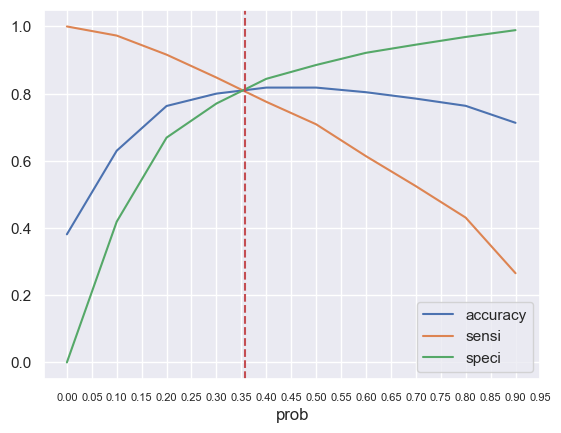

In [104]:
# Plotting accuracy, sensitivity and specificity for various probabilities:-


#plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

#### From the curve above, it seems that  0.358 is optimal cutoff point to take .

In [105]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point:-

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [106]:
# Dropping the unnecessary columns:-

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [107]:
#Displaying the head:-

y_train_pred_final.head() 

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.523908         1871                1
1          0        0.113210         6795                0
2          0        0.336138         3516                0
3          0        0.818610         8105                1
4          0        0.291813         3934                0

### Assigning lead score to the leads based to prediction

In [108]:
# Assigning the 'Lead_Score' based on 'Converted_Prob' :-

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [109]:
# Selecting only important columns and displaying head of dataframe:-

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.523908         1871                1          52
1          0        0.113210         6795                0          11
2          0        0.336138         3516                0          34
3          0        0.818610         8105                1          82
4          0        0.291813         3934                0          29

### Model Evaluation

### Confusion Matrix 

In [110]:
#Importing 'metrics' library:-

from sklearn import metrics

# Confusion matrix:-

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3275  727]
 [ 489 1977]]


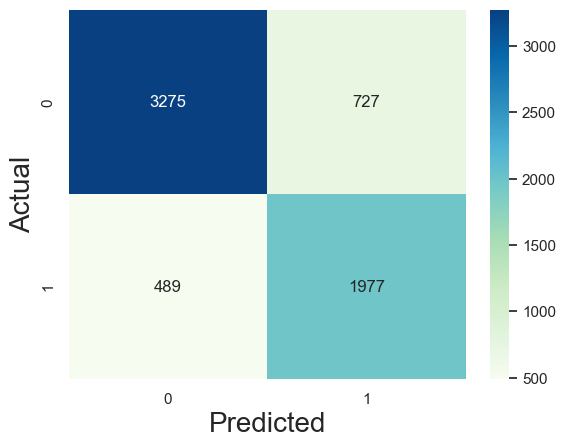

In [111]:
#Importing library to plot confusion matrix:-
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [112]:
# Actual/Predicted     not_converted   converted
        # not_converted        3275          727
        # converted            489          1977 

In [113]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8119975262832406

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Checking the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.8017031630170316

In [116]:
# Calculating specificity:-

TN / float(TN+FP)

0.8183408295852074

In [117]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.1816591704147926


In [118]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7311390532544378


In [119]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8700850159404888


#### Precision and Recall

##### Precision
TP / TP + FP

In [120]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7311390532544378

##### Recall
TP / TP + FN

In [121]:
# Calculating 'Recall' :-

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8017031630170316

Using sklearn utilities for the same

In [122]:
#Importing 'precision_score' and 'recall_score':_

from sklearn.metrics import precision_score, recall_score

In [123]:
# Calculating Precision value:-

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7311390532544378

In [124]:
#Calculating Recall value:-

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8017031630170316

### Observation

We have the following values for the Train Data:

- Accuracy :    81.1%
- Sensitivity : 80.1%
- Specificity : 81.8%
- Pricision:    73.1%
- Recall:       80.1%

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

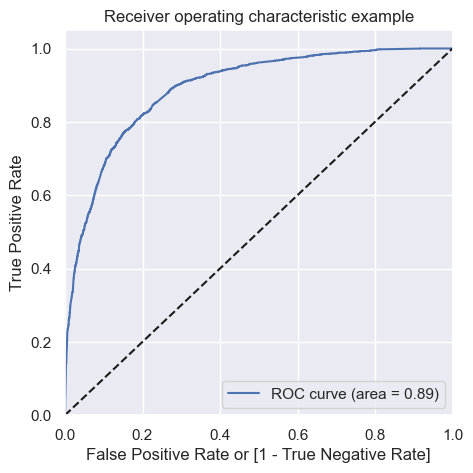

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### Observation

We are getting a good value of 0.89 indicating a good predictive model.As ROC Curve should be a value close to 1. 

### Precision and recall tradeoff

In [128]:
# Importing required library for 'precision_recall_curve' :-

from sklearn.metrics import precision_recall_curve

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

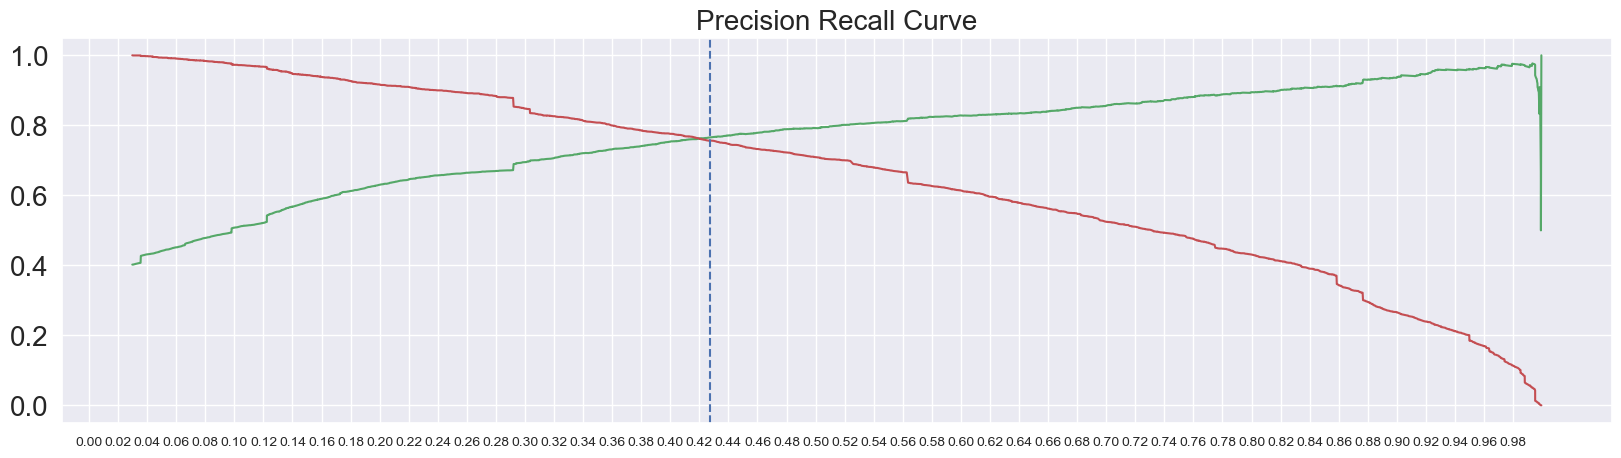

In [130]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

### Observation
From above above 'precision_recall_curve' we can see that cutoff point is 0.427.

##### Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation

In [131]:
# plotting the Train dataset again with 0.427 as cutoff:-

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  \
0          0        0.523908         1871                1          52   
1          0        0.113210         6795                0          11   
2          0        0.336138         3516                0          34   
3          0        0.818610         8105                1          82   
4          0        0.291813         3934                0          29   

   final_predicted_2  
0                  1  
1                  0  
2                  0  
3                  1  
4                  0

In [132]:
# Confusion matrix:-

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3431  571]
 [ 601 1865]]


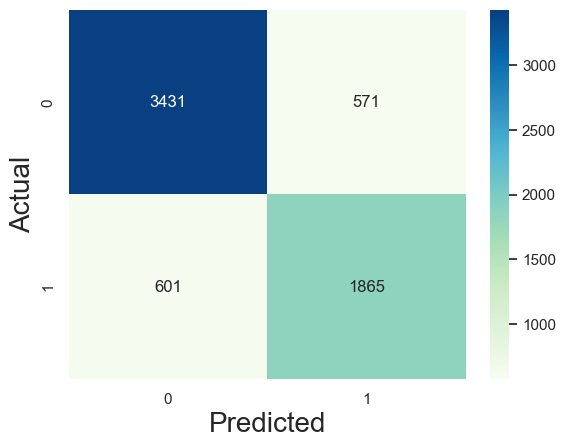

In [133]:
# Plotting confusion matrix:-
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [134]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8188002473716759

In [135]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [136]:
# Checking the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.7562854825628548

In [137]:
# Calculating specificity:-

TN / float(TN+FP)

0.8573213393303348

In [138]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7655993431855501


In [139]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8509424603174603


In [140]:
# Pricision:-

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7655993431855501

In [141]:
# Calculating 'Recall' :-

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.7562854825628548

##### Observation
By using the Precision - Recall trade off curve cut off point True Positive number has decrease and True Negative number has increase

Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive so 'Recall'/'sensitivity' decreased for this point We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.358 as optimal cutoff point.

### Making predictions on the test set

##### Applying scaling on test data 

In [142]:
# Applying 'transform' to scale the 'test' data set:-

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [143]:
# Predicting using values used by the final model i.e. logm6:-

test_col = X_train_sm6.columns

X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2772 non-null   float64
 1   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 2   Lead Origin_Lead Add Form                             2772 non-null   uint8  
 3   Lead Source_Olark Chat                                2772 non-null   uint8  
 4   Lead Source_Welingak Website                          2772 non-null   uint8  
 5   Last Activity_Email Opened                            2772 non-null   uint8  
 6   Last Activity_Olark Chat Conversation                 2772 non-null   uint8  
 7   Last Activity_Other_Activity                          2772 non-null   uint8  
 8   Last Activity_SMS Sent                                2

#### Making Predictions on the X_test dataset using the final model

In [144]:
# Predicting on test data set using final model :-

y_test_pred = logm6.predict(X_test)

In [145]:
# Checking top 10 rows:-

y_test_pred[:10]

4269    0.509691
2376    0.876463
7766    0.695625
9199    0.097992
4359    0.858497
9186    0.575836
1631    0.486593
8963    0.188417
8007    0.042382
5324    0.360571
dtype: float64

In [146]:
# Converting y_test_pred to a dataframe :-

y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
# Let's see the head
y_pred_1.head()

0
4269  0.509691
2376  0.876463
7766  0.695625
9199  0.097992
4359  0.858497

In [148]:
# Converting y_test to dataframe:-

y_test_df = pd.DataFrame(y_test)

In [149]:
# Putting 'Prospect ID' to index:-

y_test_df['Prospect ID'] = y_test_df.index

In [150]:
# Removing index for both dataframes to append them side by side :-

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Appending y_test_df and y_pred_1:-

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
# Displaying head of 'y_pred_final' :-

y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.509691
1          1         2376  0.876463
2          1         7766  0.695625
3          0         9199  0.097992
4          1         4359  0.858497

In [153]:
# Renaming the column '0' as 'Converted_Prob':-

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [154]:
# Rearranging the columns:-

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [155]:
# Let's see the head of y_pred_final:-

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.509691
1         2376          1        0.876463
2         7766          1        0.695625
3         9199          0        0.097992
4         4359          1        0.858497

In [156]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':-

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [157]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         4269          1        0.509691          51
1         2376          1        0.876463          88
2         7766          1        0.695625          70
3         9199          0        0.097992          10
4         4359          1        0.858497          86

#### Using Cutoff point of 0.357 from Sentivity - Specificity - Accuracy plot cut-off point

In [158]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.357:-

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

In [159]:
# Displaying the head of 'y_pred_final' dataframe:-

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
0         4269          1        0.509691          51                1
1         2376          1        0.876463          88                1
2         7766          1        0.695625          70                1
3         9199          0        0.097992          10                0
4         4359          1        0.858497          86                1

### Test model evaluation

In [160]:
# Checking the overall accuracy:-

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8095238095238095

#### Confusion Matrix

In [161]:
# Calculating confusion matrix for test data:-

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1367,  310],
       [ 218,  877]], dtype=int64)

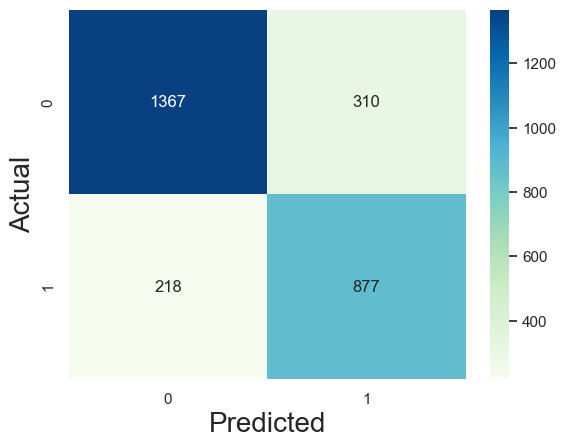

In [162]:
# Plotting confusion matrix:-
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Let's see the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.8009132420091324

In [165]:
# Let us calculate specificity:-

TN / float(TN+FP)

0.8151460942158617

In [166]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.18485390578413835


In [167]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7388374052232519


In [168]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8624605678233438


### Precision and Recall

In [169]:
# Calculating 'precision_score':-

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7388374052232519

In [170]:
#Calculating 'recall_score':-

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8009132420091324

### Observation

The sensitivity value for test data is 80% while for train data is also 80% . The accuracy values is ~ 80%. Which shows that model is performing well for test data set also.

### Determining top feature based on final model (logm6)

In [171]:
# Displaying parameters obtained by final model 'logm6':-

pd.options.display.float_format = '{:.2f}'.format # Setting format option
logm6.params[1:]

Lead Origin_Landing Page Submission                    -1.02
Lead Origin_Lead Add Form                               2.80
Lead Source_Olark Chat                                  1.09
Lead Source_Welingak Website                            2.45
Last Activity_Email Opened                              0.68
Last Activity_Olark Chat Conversation                  -0.65
Last Activity_Other_Activity                            2.19
Last Activity_SMS Sent                                  1.82
Last Activity_Unsubscribed                              1.35
Specialization_Hospitality Management                  -1.00
Specialization_not provided                            -0.98
What is your current occupation_Working Professional    2.39
What is your current occupation_not provided           -1.08
Do Not Email                                           -1.19
Total Time Spent on Website                             1.06
dtype: float64

In [172]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = logm6.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Landing Page Submission                    -36.54
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  39.07
Lead Source_Welingak Website                            87.55
Last Activity_Email Opened                              24.26
Last Activity_Olark Chat Conversation                  -23.32
Last Activity_Other_Activity                            78.27
Last Activity_SMS Sent                                  64.91
Last Activity_Unsubscribed                              48.35
Specialization_Hospitality Management                  -35.60
Specialization_not provided                            -35.06
What is your current occupation_Working Professional    85.32
What is your current occupation_not provided           -38.69
Do Not Email                                           -42.65
Total Time Spent on Website                             37.92
dtype: float64

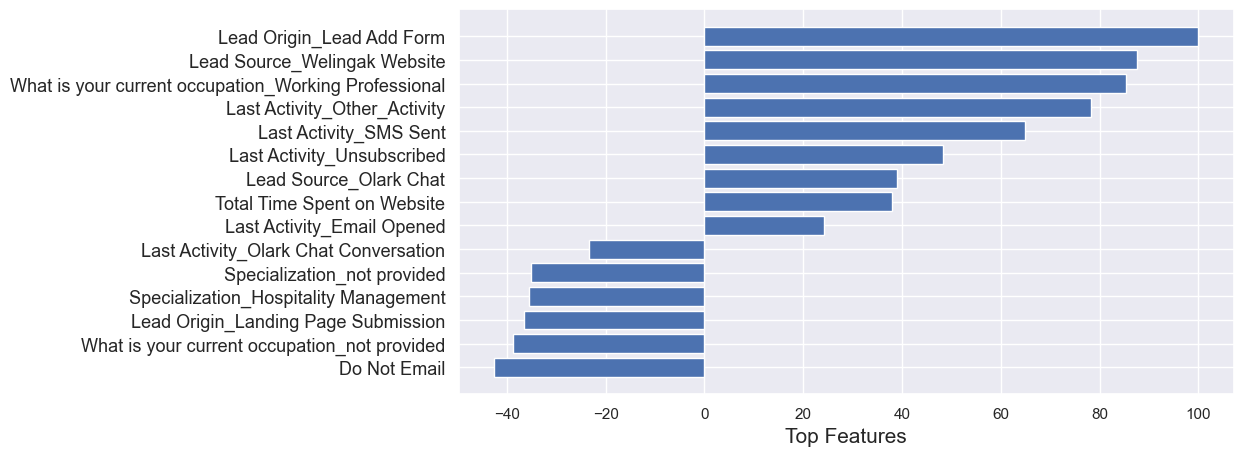

In [173]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_new.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

In [174]:
logm6.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.80
Lead Source_Welingak Website                            2.45
What is your current occupation_Working Professional    2.39
Last Activity_Other_Activity                            2.19
Last Activity_SMS Sent                                  1.82
Last Activity_Unsubscribed                              1.35
Lead Source_Olark Chat                                  1.09
Total Time Spent on Website                             1.06
Last Activity_Email Opened                              0.68
Last Activity_Olark Chat Conversation                  -0.65
const                                                  -0.74
Specialization_not provided                            -0.98
Specialization_Hospitality Management                  -1.00
Lead Origin_Landing Page Submission                    -1.02
What is your current occupation_not provided           -1.08
Do Not Email                                           -1.19
dtype: float64

### Final Observation

We have the following values for the Train Data:

- Accuracy :    81.1%
- Sensitivity : 80.1%
- Specificity : 81.8%
- Pricision:    73.1%
- Recall:       80.1%

Evaluation Metrics for the test Dataset:-
- Accuracy : 80.95%
- Sensitivity: 80.09%
- Specificity: 81.5%
- Precision: 73.88%
- Recall: 80.09%


## Recommendation:

To enhance the likelihood of converting potential leads, X-Education should concentrate on key features that significantly contribute to a favorable conversion rate:

1. Lead Origin_Lead Add Form: Concentrate on the 'Lead Add Form' as leads generated through this method demonstrate a higher conversion rate. Prioritizing this form can result in an increased number of leads with a higher probability of conversion.

2. Lead Source_Welingak Website: Prioritize efforts on the 'Welingak Website' as leads originating from there exhibit a higher conversion rate. Focusing on this source can attract more potential leads for the company. 

3. Current Occupation_Working Professional: Targeting working professionals is crucial since leads identified as 'Working Professionals' show a higher conversion rate. The company should focus on attracting more leads from this occupational segment.

4. Last Activity_SMS Sent: Leads whose last activity involves receiving an SMS represent potential conversions for the company. Special attention should be given to engaging leads through SMS to maximize conversion opportunities.

5. Total Time Spent on Website: Identifying leads that spend more time on the website is essential, as these individuals have a higher potential for conversion. The company should emphasize strategies that encourage prolonged engagement on the website to capture potential leads.